In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

In [2]:
plt.clf() 

<Figure size 432x288 with 0 Axes>

In [5]:
ls datos/data_cleaned/ 

cr.csv  mx.csv  pe.csv  uy.csv


In [89]:
df = pd.read_csv('/home/denis/Escritorio/tweets.csv', header = None)

In [59]:
import pickle

In [60]:
vectorizerMVS = pickle.load(open('modelos/vectorizerMVS.sav', 'rb'))
classifierMVS = pickle.load(open('modelos/classifierMVS.sav', 'rb'))

In [95]:
df = df.assign(sentiment = None)
for i in range (len(df[0])):
    text_vectorMVS = vectorizerMVS.transform([df[0][i]])
    df['sentiment'][i] = classifierMVS.predict(text_vectorMVS)[0]
    
    

In [96]:
df

,0,sentiment
0,@NoilyMV yo soy totalmente puntual,N
1,@SandraCauffman Hola Sandrita. No le habia des...,P
2,Si andan haciendo eso mejor se quedaran callad...,N
3,Que pereza quiero choco banano,N
4,"@robertobrenes Bueno, no es tanto lo mayor com...",N
...,...,...
96,@GaboJimenex jajaja. Yo me pegué el susto de l...,P
97,"@dimar1712 tan linda Diana, muchas gracias vam...",P
98,@GrupoPandora y son 30...30 años de acompañarn...,P
99,@AleeSeke ooops cierto. Me mata @raqueabr02,N


<AxesSubplot:>

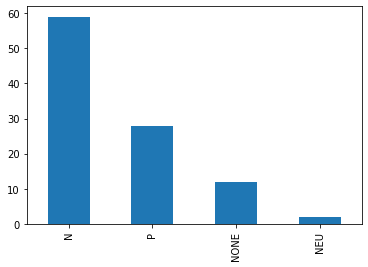

In [98]:
df['sentiment'].value_counts().plot(kind='bar')

In [99]:
img = io.BytesIO()
datos = df['sentiment'].value_counts().head(10).tolist()

In [100]:
datos

[59, 28, 12, 2]

([<matplotlib.patches.Wedge at 0x7fb4cff88af0>,
 [Text(-0.2874541312823803, 1.0617768703492707, ''),
  Text(-0.1872678560299877, -1.083942226365378, ''),
  Text(0.9665627811212326, -0.5251251185681259, ''),
  Text(1.0978721625167702, -0.06838651015186241, '')],
 [Text(-0.15679316251766195, 0.5791510201905112, '58.4 %'),
  Text(-0.10214610328908418, -0.5912412143811151, '27.7 %'),
  Text(0.5272160624297632, -0.2864318828553414, '11.9 %'),
  Text(0.5988393613727837, -0.037301732810106764, '2.0 %')])

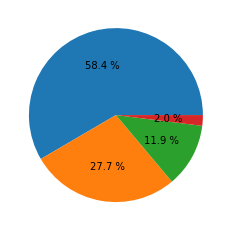

In [101]:
plt.pie(datos, autopct="%0.1f %%")

In [54]:
base64.b64encode(img.getvalue())

b''

In [23]:
img.seek(0)
plot_url = base64.b64encode(img.getvalue()).decode()

In [24]:
plot_url

''

In [34]:
df['sentiment'].value_counts()

N       815
P       533
NONE    248
NEU     170
Name: sentiment, dtype: int64

In [36]:
df['sentiment'].value_counts().head(4).tolist()

[815, 533, 248, 170]

([<matplotlib.patches.Wedge at 0x7fb4ddf4a100>,
 [Text(0.13273981189574272, 1.0919616029595012, ''),
  Text(-0.8368912740134483, -0.713871834071178, ''),
  Text(0.5511292378237044, -0.9519750853965995, ''),
  Text(1.0500808788990064, -0.3276128015976947, '')],
 [Text(0.0724035337613142, 0.5956154197960914, '46.1 %'),
  Text(-0.4564861494618808, -0.3893846367660971, '30.2 %'),
  Text(0.3006159479038387, -0.5192591374890542, '14.0 %'),
  Text(0.572771388490367, -0.1786978917805607, '9.6 %')])

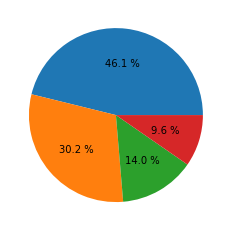

In [38]:
plt.pie(datos, autopct="%0.1f %%")

In [43]:
datos

[815, 533, 248, 170]

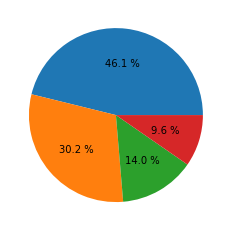

In [26]:
plt.clf() 
img = io.BytesIO()
datos = df['sentiment'].value_counts().head(10).tolist()
plt.pie(datos, autopct="%0.1f %%")
img.seek(0)
plot_url = base64.b64encode(img.getvalue()).decode()

([<matplotlib.patches.Wedge at 0x7fb4ddfead90>,
 [Text(0.13273981189574272, 1.0919616029595012, ''),
  Text(-0.8368912740134483, -0.713871834071178, ''),
  Text(0.5511292378237044, -0.9519750853965995, ''),
  Text(1.0500808788990064, -0.3276128015976947, '')],
 [Text(0.0724035337613142, 0.5956154197960914, '46.1 %'),
  Text(-0.4564861494618808, -0.3893846367660971, '30.2 %'),
  Text(0.3006159479038387, -0.5192591374890542, '14.0 %'),
  Text(0.572771388490367, -0.1786978917805607, '9.6 %')])

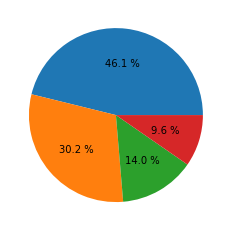

In [31]:
plt.pie(datos, autopct="%0.1f %%")

In [107]:
texto = ''
for i in df[0]:
    texto += i +' '

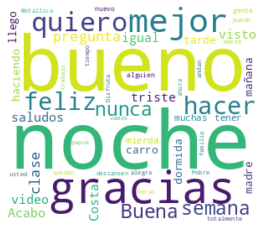

In [123]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


wordcloud = WordCloud(width = 300, height=260,background_color="white" ,
                      stopwords = stopwords.words('spanish'), 
                      min_word_length = 5, max_words=50).generate(texto) 
  
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=6, y=6) 
plt.show() 

In [ ]:
wordcloud = WordCloud(width = 300, height=260,background_color="white" ,
            stopwords=stops, min_word_length = 4, max_words=30, 
                      min_font_size=12).generate(op_pos) 
  
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=6, y=6) 
plt.show() 